In [3]:
import nltk

import matplotlib.pyplot as plt
import numpy as np

from gensim.models import Word2Vec
from mpl_toolkits.mplot3d import Axes3D
from nltk import FreqDist
from sklearn.decomposition import PCA

%matplotlib inline

In [4]:
import dataloader
import textprocessor

In [5]:
documents = dataloader.load_data("data/posts/*")
len(documents)

46

In [6]:
documents = textprocessor.process_documents(documents)
len(documents)

46

In [7]:
# tokenize
tokens = [nltk.word_tokenize(doc) for doc in documents]

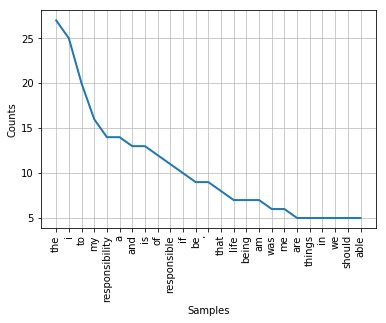

In [8]:
freq = FreqDist(tokens[5])
freq.plot(25, cumulative=False)

In [9]:
# train model
model = Word2Vec(tokens, min_count=1, size=300)
print(model)

# access vocabulary
vocabs = list(model.wv.vocab)
len(vocabs)

Word2Vec(vocab=5305, size=300, alpha=0.025)


5305

In [10]:
# access vector
print(model['paradox'].shape)

(300,)


/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [11]:
# save model
model.save('data/nishparadox.bin')

In [12]:
model.wv.vocab['life'].count

154

In [13]:
# remove stopwords
stopwords = dataloader.load_stopwords("data/stopwords")
vocabs_filtered = textprocessor.remove_stopwords(vocabs, stopwords)
# remove single character
vocabs_filtered = list(filter(lambda s : len(s)>1, vocabs_filtered))
len(vocabs_filtered)

4943

In [14]:
# get sorted vocab with count
vocab_counts = sorted([ (v, model.wv.vocab[v].count) for v in vocabs_filtered ], key = lambda x : x[1], reverse=True)
vocab_counts[:10]

[('life', 154),
 ('people', 108),
 ('time', 105),
 ('mind', 77),
 ('don', 63),
 ('world', 51),
 ('feel', 47),
 ('love', 46),
 ('things', 45),
 ('thoughts', 39)]

In [15]:
# get top n words
n = 100
words, counts = zip(*vocab_counts)
vocabs_topn = words[:n]
vocabs_topn[:10]

('life',
 'people',
 'time',
 'mind',
 'don',
 'world',
 'feel',
 'love',
 'things',
 'thoughts')

/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


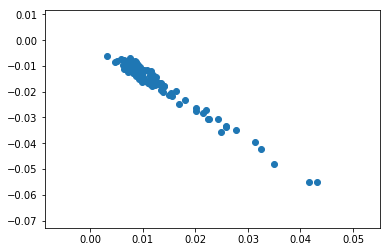

In [16]:
# get vectors
vectors = model[vocabs_topn]
#print(vectors)
X = vectors[:, 0]
Y = vectors[:, 1]
Z = vectors[:, 2]
plt.scatter(X, Y)

In [37]:
%matplotlib qt
# plot
fig, ax = plt.subplots()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c='skyblue', s=150)

for i, txt in enumerate(vocabs_topn):
    #ax.annotate(txt, (X[i],Y[i], Z[i]))
    ax.text(X[i], Y[i], Z[i], txt, color='red')
plt.show()

In [20]:
# get most similar
model.most_similar(positive=['coffee'])

/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('haven', 0.9420965909957886),
 ('flight', 0.9415743350982666),
 ('computer', 0.9411171078681946),
 ('waiting', 0.9404005408287048),
 ('procrastination', 0.9403262734413147),
 ('th', 0.9403054714202881),
 ('tolerate', 0.9399700164794922),
 ('here', 0.9398511648178101),
 ('mere', 0.93975830078125),
 ('boy', 0.9397413730621338)]

In [21]:
res = model['life'] - model['coffee']
np.dot(res, model['death'])/(np.linalg.norm(res) * np.linalg.norm(model['death']))

/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


0.9986192

### Principal Component Analysis
Let's project nd vector to lower dimension using PCA

In [30]:
pca2d = PCA(n_components=2)
comp2d = pca2d.fit_transform(vectors)
print(comp2d.shape)

pca3d = PCA(n_components=3)
comp3d = pca3d.fit_transform(vectors)
comp3d.shape

(100, 2)


(100, 3)

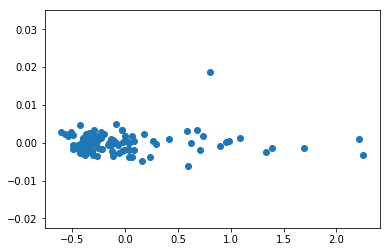

In [40]:
%matplotlib inline
# visualize in 2d space
#print(vectors)
Xp = comp2d[:, 0]
Yp = comp2d[:, 1]
plt.scatter(Xp, Yp)

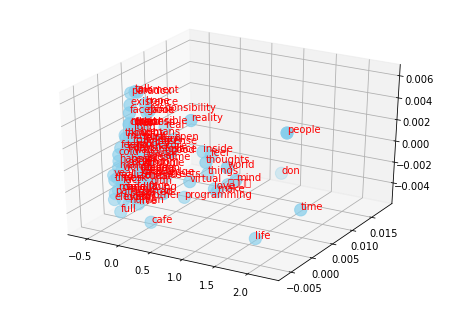

In [42]:
%matplotlib inline

# visualize in 3d space
Xp = comp3d[:, 0]
Yp = comp3d[:, 1]
Zp = comp3d[:, 2]

# plot
fig, ax = plt.subplots()
ax = Axes3D(fig)
ax.scatter(Xp, Yp, Zp, c='skyblue', s=150)

for i, txt in enumerate(vocabs_topn):
    #ax.annotate(txt, (X[i],Y[i], Z[i]))
    ax.text(Xp[i], Yp[i], Zp[i], txt, color='red')
plt.show()